# <center >Cryptocurrency Price Prediction Using Deep Learning <center >

## 1- Imports

In [1]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from sklearn import metrics 

## 2- Getting real-time crptocurrency data

In [2]:
result=requests.get('https://min-api.cryptocompare.com/data/histoday'+ '?fsym=BTC&tsym=CAD&limit=500')

In [3]:
result.content

b'{"Response":"Success","Type":100,"Aggregated":false,"TimeTo":1621036800,"TimeFrom":1577836800,"FirstValueInArray":true,"ConversionType":{"type":"direct","conversionSymbol":""},"Data":[{"time":1577836800,"high":9421.1,"low":9290.1,"open":9345.1,"volumefrom":20.04,"volumeto":187481.49,"close":9301.3,"conversionType":"direct","conversionSymbol":""},{"time":1577923200,"high":9341.9,"low":9012,"open":9301.3,"volumefrom":92.92,"volumeto":847343.63,"close":9020,"conversionType":"direct","conversionSymbol":""},{"time":1578009600,"high":9600,"low":8883.6,"open":9020,"volumefrom":98.31,"volumeto":920782.43,"close":9516.5,"conversionType":"direct","conversionSymbol":""},{"time":1578096000,"high":9600,"low":9438.2,"open":9516.5,"volumefrom":88.07,"volumeto":838096.92,"close":9559.7,"conversionType":"direct","conversionSymbol":""},{"time":1578182400,"high":9719.7,"low":9468.6,"open":9559.7,"volumefrom":88.45,"volumeto":850305.14,"close":9535.8,"conversionType":"direct","conversionSymbol":""},{"ti

In [4]:
json.loads(result.content)

{'Response': 'Success',
 'Type': 100,
 'Aggregated': False,
 'TimeTo': 1621036800,
 'TimeFrom': 1577836800,
 'FirstValueInArray': True,
 'ConversionType': {'type': 'direct', 'conversionSymbol': ''},
 'Data': [{'time': 1577836800,
   'high': 9421.1,
   'low': 9290.1,
   'open': 9345.1,
   'volumefrom': 20.04,
   'volumeto': 187481.49,
   'close': 9301.3,
   'conversionType': 'direct',
   'conversionSymbol': ''},
  {'time': 1577923200,
   'high': 9341.9,
   'low': 9012,
   'open': 9301.3,
   'volumefrom': 92.92,
   'volumeto': 847343.63,
   'close': 9020,
   'conversionType': 'direct',
   'conversionSymbol': ''},
  {'time': 1578009600,
   'high': 9600,
   'low': 8883.6,
   'open': 9020,
   'volumefrom': 98.31,
   'volumeto': 920782.43,
   'close': 9516.5,
   'conversionType': 'direct',
   'conversionSymbol': ''},
  {'time': 1578096000,
   'high': 9600,
   'low': 9438.2,
   'open': 9516.5,
   'volumefrom': 88.07,
   'volumeto': 838096.92,
   'close': 9559.7,
   'conversionType': 'direct',

In [5]:
json.loads(result.content).keys()

dict_keys(['Response', 'Type', 'Aggregated', 'TimeTo', 'TimeFrom', 'FirstValueInArray', 'ConversionType', 'Data', 'RateLimit', 'HasWarning'])

In [6]:
json.loads(result.content)['Data']

[{'time': 1577836800,
  'high': 9421.1,
  'low': 9290.1,
  'open': 9345.1,
  'volumefrom': 20.04,
  'volumeto': 187481.49,
  'close': 9301.3,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1577923200,
  'high': 9341.9,
  'low': 9012,
  'open': 9301.3,
  'volumefrom': 92.92,
  'volumeto': 847343.63,
  'close': 9020,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1578009600,
  'high': 9600,
  'low': 8883.6,
  'open': 9020,
  'volumefrom': 98.31,
  'volumeto': 920782.43,
  'close': 9516.5,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1578096000,
  'high': 9600,
  'low': 9438.2,
  'open': 9516.5,
  'volumefrom': 88.07,
  'volumeto': 838096.92,
  'close': 9559.7,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1578182400,
  'high': 9719.7,
  'low': 9468.6,
  'open': 9559.7,
  'volumefrom': 88.45,
  'volumeto': 850305.14,
  'close': 9535.8,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 15782

In [7]:
data= pd.DataFrame(json.loads(result.content)['Data'])
data.head(2)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1577836800,9421.1,9290.1,9345.1,20.04,187481.49,9301.3,direct,
1,1577923200,9341.9,9012.0,9301.3,92.92,847343.63,9020.0,direct,


# 3- Set time as index

In [8]:
data=data.set_index('time')
data.head(2)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
1577836800,9421.1,9290.1,9345.1,20.04,187481.49,9301.3,direct,
1577923200,9341.9,9012.0,9301.3,92.92,847343.63,9020.0,direct,


# 4- Data cleaning

In [9]:
data.isnull().sum()

high                0
low                 0
open                0
volumefrom          0
volumeto            0
close               0
conversionType      0
conversionSymbol    0
dtype: int64

# 5- Set time as index

In [10]:
type(data.index[0])

numpy.int64

I have used Canadian exchange rate and stored the real time data into a pandas data-frame. I used to_datetime() method to convert string Date time into Python Date time object. This is necessary as Date time objects in the file are read as a string object. 

In [11]:
data.index=pd.to_datetime(data.index, unit='s')
data.head(2)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2020-01-01,9421.1,9290.1,9345.1,20.04,187481.49,9301.3,direct,
2020-01-02,9341.9,9012.0,9301.3,92.92,847343.63,9020.0,direct,


Next, I split the data into two sets — training set and test set with 80% and 20% data respectively. The decision made here is just for the purpose of this tutorial. In real projects, you should always split your data into training, validation, testing (like 60%, 20%, 20%).

# 6- Splitting Train & Test set

In [12]:
def train_test_split(df, test_size):
    split = df.shape[0] - int(test_size * df.shape[0])
    train_set = df.iloc[:split]
    test_set = df.iloc[split:]
    return train_set, test_set

train_set, test_set =train_test_split(data, 0.2)    #checked test size 0.2 but the result for 0.3 is better
print('train_set.shape: ', train_set.shape)
print('test_set.shape: ', test_set.shape)

train_set.shape:  (401, 8)
test_set.shape:  (100, 8)


# 7- Plotting train & test sets

Now let’s plot the cryptocurrency prices in Canadian dollars as a function of time using the below code:

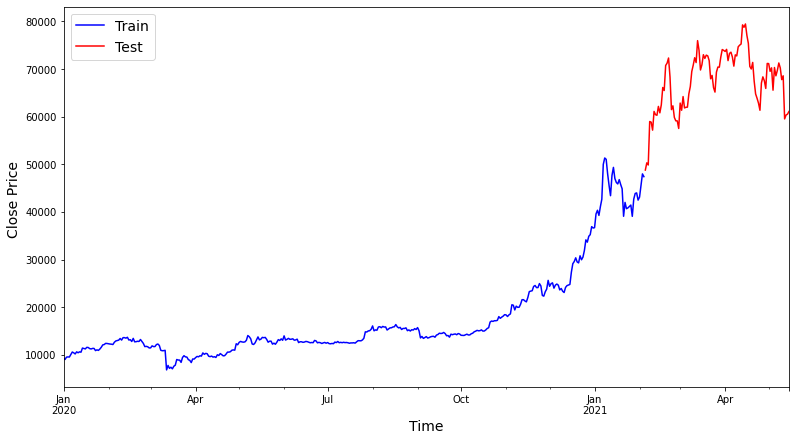

In [13]:
plt.figure(figsize=(13,7))
train_set['close'].plot(color='b')
test_set['close'].plot(color='r')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Close Price ', fontsize=14)
plt.legend(['Train', 'Test'], loc='best',fontsize=14 )
plt.show()

We can observe that there is a clear dip in prices between Jan 2020 and Oct 2020. The prices keep on increasing from Oct 2020  to Apr 2021  with fluctuations happening in the months of Jan, Feb, Mar, Apr. 

# 9- Normalizing Data- Zero Scaling

Next, I made a couple of functions to normalize the values. Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

Next, I made a function to extract data of windows which are of size 5 each as shown in the code below:

I continued with making a function to prepare the data in a format to be later fed into the neural network. I used the same concept of splitting the data into two sets — training set and test set with 80% and 20% data respectively as shown in the code below:`    
    

In [14]:
def zero_scaling(df):
    
    return df / df.iloc[0] - 1



def sliding_window(df, len_window, zero):
    
    window = []
    for a in range(df.shape[0] - len_window):
        sub = df[a: (a + len_window)].copy()
        if zero:
            sub = zero_scaling(sub)
        window.append(sub.values)
    return np.array(window)



def prepare_data(df, column, len_window, zero):
    
    train_data = train_set[[column]]
    test_data = test_set[[column]]
        
    X_train = sliding_window(train_data, len_window, zero)  
    X_test = sliding_window(test_data, len_window, zero) 

    y_train = train_data[column][len_window:].values
    y_test = test_data[column][len_window:].values

    if zero:
        y_train = y_train / train_data[column][:-len_window].values - 1
        y_test = y_test / test_data[column][:-len_window].values - 1

    return train_data,  test_data, X_train, X_test,  y_train, y_test

In [15]:
train_data, test_data, X_train, X_test,  y_train, y_test = prepare_data(data, 'close', len_window=5, zero=True)

In [16]:
X_train.shape

(396, 5, 1)

# 10- Building LSTM model- 2 Layers

It works by using special gates to allow each LSTM layer to take information from both previous layers and the current layer. The data goes through multiple gates (like forget gate, input gate, etc.) and various activation functions (like the tanh function, relu function) and is passed through the LSTM cells. The main advantage of this is that it allows each LSTM cell to remember patterns for a certain amount of time. The thing to be noted is that LSTM can remember important information and at the same time forget irrelevant information.

Now let’s build the model. Sequential model is used for stacking all the layers (input, hidden and output). The neural network comprises of a LSTM layer followed by 20% Dropout layer and a Dense layer with linear activation function. I complied the model using Adam as the optimizer and Mean Squared Error as the loss function.

In [17]:
model = Sequential()
                                   
#use  input_shape (tuple of integers) when using this layer as the first layer in a model

model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])) )  
model.add(Dropout(0.2))


model.add(Dense(units=1 ))  # tedade noroun ha
model.add(Activation('linear'))  #activation ra besoorate layer joda add konim natije behtar ast

model.compile(loss='mse', optimizer='adam')

In [18]:
# optional: from tensorflow.keras.callbacks import EarlyStopping
# optional:  es=EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)
# optional: model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, shuffle=True ,validation_data=(X_validation, y_validation), callbacks=[es])

In [19]:
# Fitting to the training set
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1 ,validation_data=(X_test, y_test))  #DEFAULT shuffle=True

Epoch 1/20
13/13 [==============================] - 5s 136ms/step - loss: 0.0074 - val_loss: 0.0059
Epoch 2/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 3/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 4/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 7/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 8/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 9/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 10/20
13/13 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 11

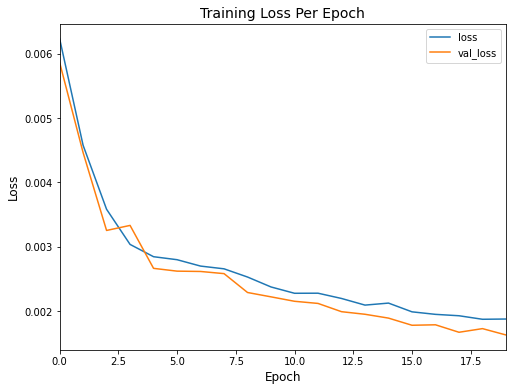

In [20]:
pd.DataFrame(model.history.history).plot(figsize=(8,6))
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Per Epoch', fontsize=14)
plt.show()

In [21]:
prediction=model.predict(X_test).squeeze()  # use squeeze to convert to 1d array 

In [22]:
assert (len(prediction)==len(y_test))

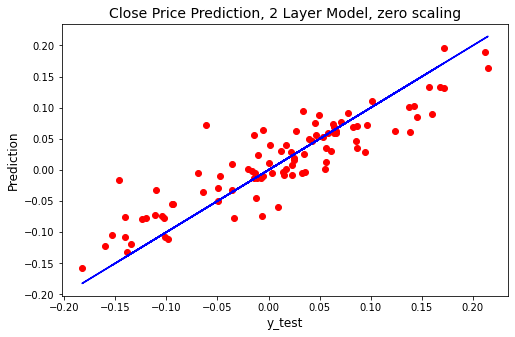

In [23]:
plt.figure(figsize=(8,5))
plt.plot(y_test, y_test, color='b')
plt.scatter(y_test, prediction, color='r')
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Close Price Prediction, 2 Layer Model, zero scaling', fontsize=14)
plt.show()

In [24]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, prediction))

Mean Absolute Error:  0.031168206515337037


In [25]:
predicted_close_price= pd.DataFrame(data=(prediction + 1) * (test_data['close'][:-5].values) ,  index=test_data[5:].index ,columns=['predicted_close_price'] )
predicted_close_price

,predicted_close_price
time,
2021-02-10,58354.788488
2021-02-11,58547.428950
2021-02-12,59329.453505
2021-02-13,60675.803838
2021-02-14,60919.419293
...,...
2021-05-11,69360.215053
2021-05-12,68654.330564
2021-05-13,63865.005129


In [26]:
merged=pd.merge(test_data, predicted_close_price, on='time', how='left')
merged

,close,predicted_close_price
time,,
2021-02-05,48795.91,NaN
2021-02-06,50309.40,NaN
2021-02-07,49862.98,NaN
2021-02-08,58992.44,NaN
2021-02-09,58862.89,NaN
...,...,...
2021-05-11,68590.09,69360.215053
2021-05-12,59536.28,68654.330564
2021-05-13,60359.91,63865.005129


In [27]:
merged.isnull().sum()

close                    0
predicted_close_price    5
dtype: int64

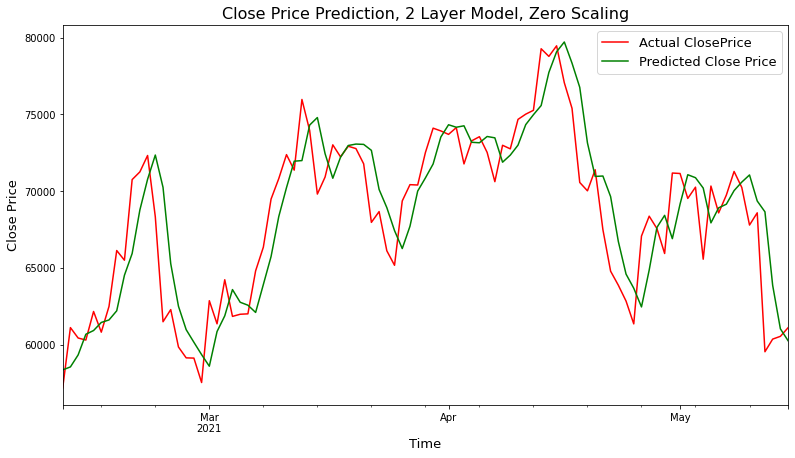

In [28]:
plt.figure(figsize=(13,7))

merged['close'][5:].plot(color='r')
merged['predicted_close_price'][5:].plot(color='g')
plt.title('Close Price Prediction, 2 Layer Model, Zero Scaling',fontsize=16)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Close Price', fontsize=13)
plt.legend(['Actual ClosePrice', 'Predicted Close Price'], loc='best',fontsize=13)
plt.show()

# 11- Predicting on Brand new data

In [29]:
#size of the data we use to predict should always be at least one unit bigger than window_len
from random import randint

def rand(len_window, df):
    return randint(len_window + 1 , df.shape[0])

In [30]:
random_shape=rand(5, data)
random_shape

229

In [34]:
new=data[['close']].iloc[0:  random_shape]
sliding_window(new, 5, True);
prediction=model.predict(sliding_window(new, 5, True)).squeeze()
assert(len(prediction)==len( new['close'][:-5]))
predicted_close_price= pd.DataFrame(data=(prediction + 1) * (new['close'][:-5].values) ,  index=new[5:].index ,columns=['predicted close'] )
pd.merge(new, predicted_close_price, on='time', how='left')[5:]

,close,predicted close
time,,
2020-01-06,10082.70,9619.451702
2020-01-07,10590.00,9863.802421
2020-01-08,10423.70,10360.892025
2020-01-09,10184.70,10530.754040
2020-01-10,10626.30,10355.561318
...,...,...
2020-08-12,15434.02,15565.735280
2020-08-13,15655.04,15459.387821
2020-08-14,15680.19,15585.467248


# 12- Backup Scenarios

### 12-1-  LSTM model- 6 Layers + Zero scaling

In [35]:
# The LSTM architecture
model = Sequential()

# First LSTM layer with Dropout regularisation
#default activation` == `tanh`
#default recurrent_activation == sigmoid.
 #return_sequences: Boolean. Whether to return the last output.Default: `False`.

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))


# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))


# The output layer
model.add(Dense(units=1))


# Compiling the RNN
model.compile(optimizer='rmsprop',loss='mean_squared_error')

In [36]:
# Fitting to the training set
model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
13/13 [==============================] - 11s 20ms/step - loss: 0.0060
Epoch 2/30
13/13 [==============================] - 0s 20ms/step - loss: 0.0066
Epoch 3/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0075
Epoch 4/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0055
Epoch 5/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0053
Epoch 6/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0039
Epoch 7/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0037
Epoch 8/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0048
Epoch 9/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0055
Epoch 10/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0044
Epoch 11/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0045
Epoch 12/30
13/13 [==============================] - 0s 21ms/step - loss: 0.0035
Epoch 13/30
13/13 [=================

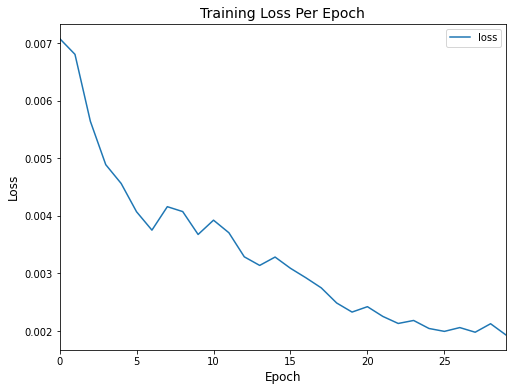

In [37]:
pd.DataFrame(model.history.history).plot(figsize=(8,6))
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Per Epoch', fontsize=14)
plt.show()

In [38]:
prediction=model.predict(X_test).squeeze()  # use squeeze to convert to 1d array 

assert (len(prediction)==len(y_test))

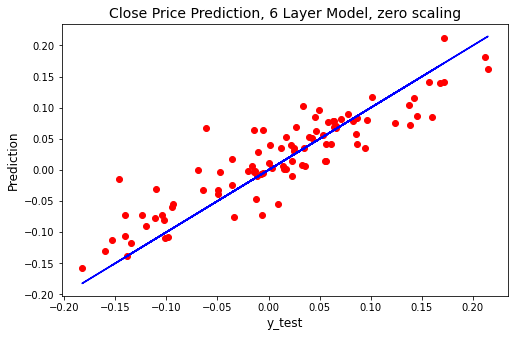

In [39]:
plt.figure(figsize=(8,5))
plt.plot(y_test, y_test, color='b')
plt.scatter(y_test, prediction, color='r')
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Close Price Prediction, 6 Layer Model, zero scaling', fontsize=14)
plt.show()

In [40]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, prediction))

Mean Absolute Error:  0.030608723353266813


In [41]:
predicted_close_price= pd.DataFrame(data=(prediction + 1) * (test_data['close'][:-5].values) ,  index=test_data[5:].index ,columns=['predicted_close_price'] )
predicted_close_price;

merged=pd.merge(test_data, predicted_close_price, on='time', how='left')
merged

,close,predicted_close_price
time,,
2021-02-05,48795.91,NaN
2021-02-06,50309.40,NaN
2021-02-07,49862.98,NaN
2021-02-08,58992.44,NaN
2021-02-09,58862.89,NaN
...,...,...
2021-05-11,68590.09,69310.047329
2021-05-12,59536.28,68790.313503
2021-05-13,60359.91,63255.941669


In [42]:
merged.isnull().sum()

close                    0
predicted_close_price    5
dtype: int64

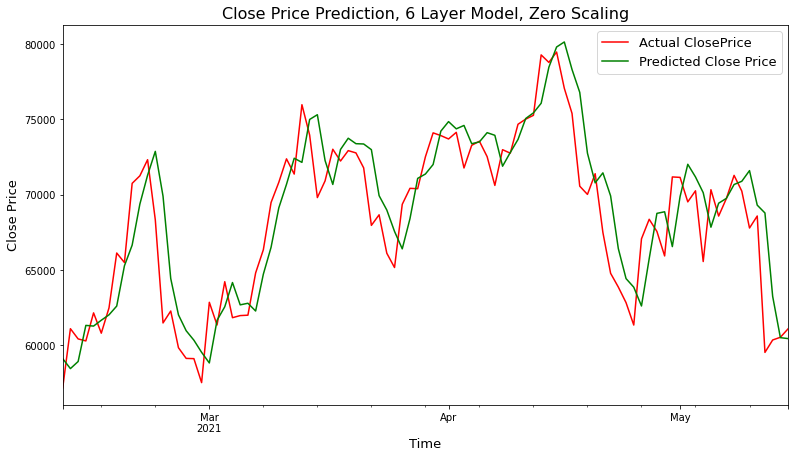

In [43]:
plt.figure(figsize=(13,7))

merged['close'][5:].plot(color='r')
merged['predicted_close_price'][5:].plot(color='g')
plt.title('Close Price Prediction, 6 Layer Model, Zero Scaling',fontsize=16)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Close Price', fontsize=13)
plt.legend(['Actual ClosePrice', 'Predicted Close Price'], loc='best',fontsize=13)
plt.show()

### 12-2- LSTM model- 2 Layers + MinMaxScaler

In [44]:
train_data = train_set[['close']]
test_data = test_set[['close']]

train_data_values=train_data.values
test_data_values=test_data.values

In [45]:
#Scaling/Normalizing the whole Training set
sc = MinMaxScaler(feature_range=(0,1))
train_data_values_scaled = sc.fit_transform(train_data_values)

In [46]:
# Since LSTMs store long term memory state, we create a data structure with 5 timesteps and 1 output
# So for each element of training set, we have 5 previous training set elements 

X_train = []
y_train = []
for i in range(5,train_data_values.shape[0]):
    X_train.append(train_data_values_scaled[i-5:i,0])  #window up to
    y_train.append(train_data_values_scaled[i,0])        #one value after the window
X_train, y_train = np.array(X_train), np.array(y_train)

In [47]:
print(X_train.shape)
print(y_train.shape)

(396, 5)
(396,)


In [48]:
# Reshaping X_train for efficient modelling
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_train.shape

(396, 5, 1)

In [49]:
model = Sequential()
                                   
#use input_shape (tuple of integers) when using this layer as the first layer in a model

model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])) )  
model.add(Dropout(0.2))

model.add(Dense(units=1 ))  
model.add(Activation('linear'))  

model.compile(loss='mse', optimizer='adam')

In [50]:
# Fitting to the training set
model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
13/13 [==============================] - 3s 7ms/step - loss: 0.1051
Epoch 2/30
13/13 [==============================] - 0s 7ms/step - loss: 0.0160
Epoch 3/30
13/13 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 4/30
13/13 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 5/30
13/13 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 6/30
13/13 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 7/30
13/13 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 8/30
13/13 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 9/30
13/13 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 10/30
13/13 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 11/30
13/13 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 12/30
13/13 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 13/30
13/13 [==============================

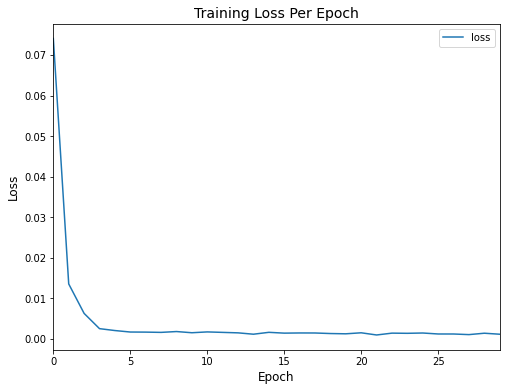

In [51]:
pd.DataFrame(model.history.history).plot(figsize=(8,6))
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Per Epoch', fontsize=14)
plt.show()

In [52]:
test_data_values_scaled = sc.fit_transform(test_data_values)  # we only do transfrom on test set not fit

In [53]:
X_test = []
y_test = []
for i in range(5,test_set.shape[0]):
    X_test.append(test_data_values_scaled[i-5:i,0])  #yek panjereh ja tayi ta sare
    y_test.append(test_data_values_scaled[i,0])        #tak element bade panjere
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape

(95, 5)

In [54]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

X_test.shape

(95, 5, 1)

In [55]:
prediction=model.predict(X_test)  #do not use squeeze, otherwise will get error in inverse scaler
assert (len(prediction)==len(y_test))

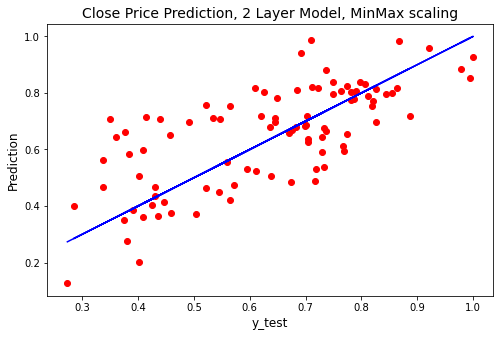

In [56]:
plt.figure(figsize=(8,5))
plt.plot(y_test, y_test, color='b')
plt.scatter(y_test, prediction, color='r')
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Close Price Prediction, 2 Layer Model, MinMax scaling', fontsize=14)
plt.show()

In [57]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, prediction))

Mean Absolute Error:  0.1077387332168316


In [58]:
predicted_close_price = sc.inverse_transform(prediction)

predicted_close_price= pd.DataFrame(data= predicted_close_price,  index=test_set[5:].index ,columns=['predicted_close_price'] )
predicted_close_price

,predicted_close_price
time,
2021-02-10,52661.003906
2021-02-11,55026.085938
2021-02-12,57303.488281
2021-02-13,59578.855469
2021-02-14,59970.593750
...,...
2021-05-11,70600.984375
2021-05-12,70535.312500
2021-05-13,69099.281250


In [59]:
merged=pd.merge(test_data, predicted_close_price, on='time', how='left')
merged

,close,predicted_close_price
time,,
2021-02-05,48795.91,NaN
2021-02-06,50309.40,NaN
2021-02-07,49862.98,NaN
2021-02-08,58992.44,NaN
2021-02-09,58862.89,NaN
...,...,...
2021-05-11,68590.09,70600.984375
2021-05-12,59536.28,70535.312500
2021-05-13,60359.91,69099.281250


In [60]:
merged.isnull().sum()

close                    0
predicted_close_price    5
dtype: int64

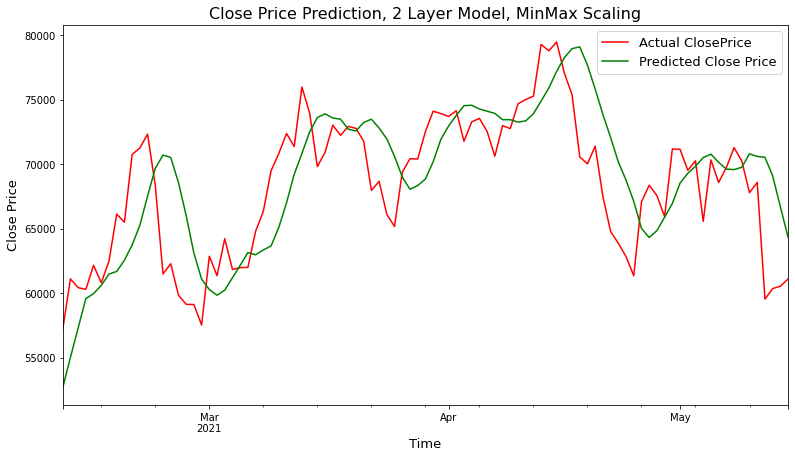

In [61]:
plt.figure(figsize=(13,7))

merged['close'][5:].plot(color='r')
merged['predicted_close_price'][5:].plot(color='g')
plt.title('Close Price Prediction, 2 Layer Model, MinMax Scaling',fontsize=16)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Close Price', fontsize=13)
plt.legend(['Actual ClosePrice', 'Predicted Close Price'], loc='best',fontsize=13)
plt.show()

# 13- Conclusion

Based on the Mean Absolute Error values and Close Price Prediction plots, the 2-layer predictive model executed on the data normalized by zero_scaling function has the best performance.